In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_clusters_per_class=2,
    flip_y=0.1,
    class_sep=0.7
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## __Models__

In [2]:
models = {
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        eval_metric="logloss"
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
}

# Training
training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times[name] = training_time

[LightGBM] [Info] Number of positive: 688, number of negative: 712
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491429 -> initscore=-0.034289
[LightGBM] [Info] Start training from score -0.034289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## __Results__

C:\Users\Joan\OneDrive\Documentos\Estudios\MUCEIM\Statistical Learning for Data Science\Exercises\.venv-portatil\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


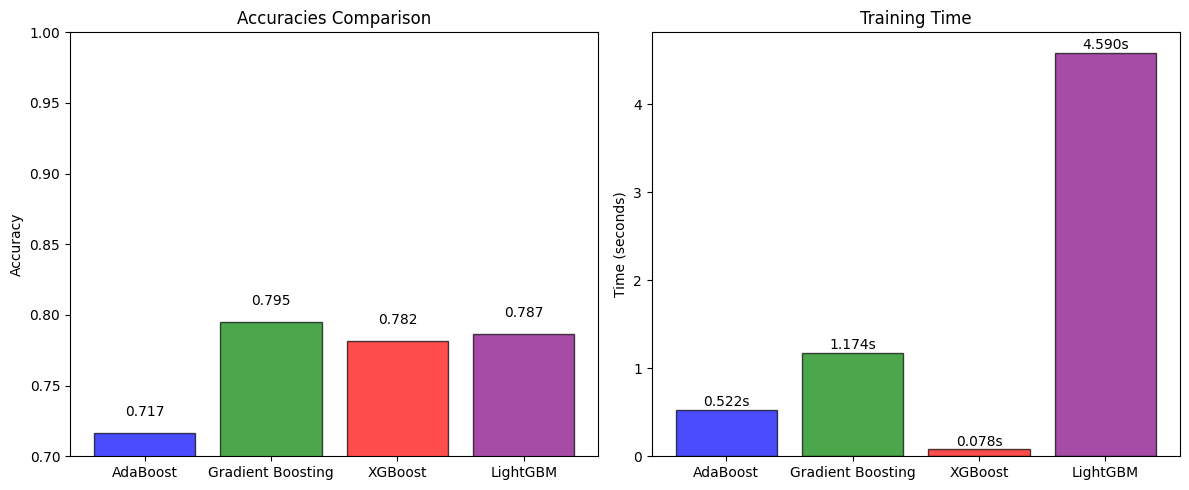

In [3]:
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

methods = list(accuracies.keys())
accuracies = list(accuracies.values())
colors = ["blue", "green", "red", "purple"]
bars1 = axes[0].bar(methods, accuracies, color=colors, alpha=0.7, edgecolor="black")
axes[0].set_title("Accuracies Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0.7, 1.0)
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f"{acc:.3f}", ha="center", va="bottom")

times = list(training_times.values())
bars2 = axes[1].bar(methods, times, color=colors, alpha=0.7, edgecolor="black")
axes[1].set_title("Training Time")
axes[1].set_ylabel("Time (seconds)")
for bar, t in zip(bars2, times):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f"{t:.3f}s", ha="center", va="bottom")

plt.tight_layout()
plt.savefig("./figures/boosting_comparison.png")
plt.show()